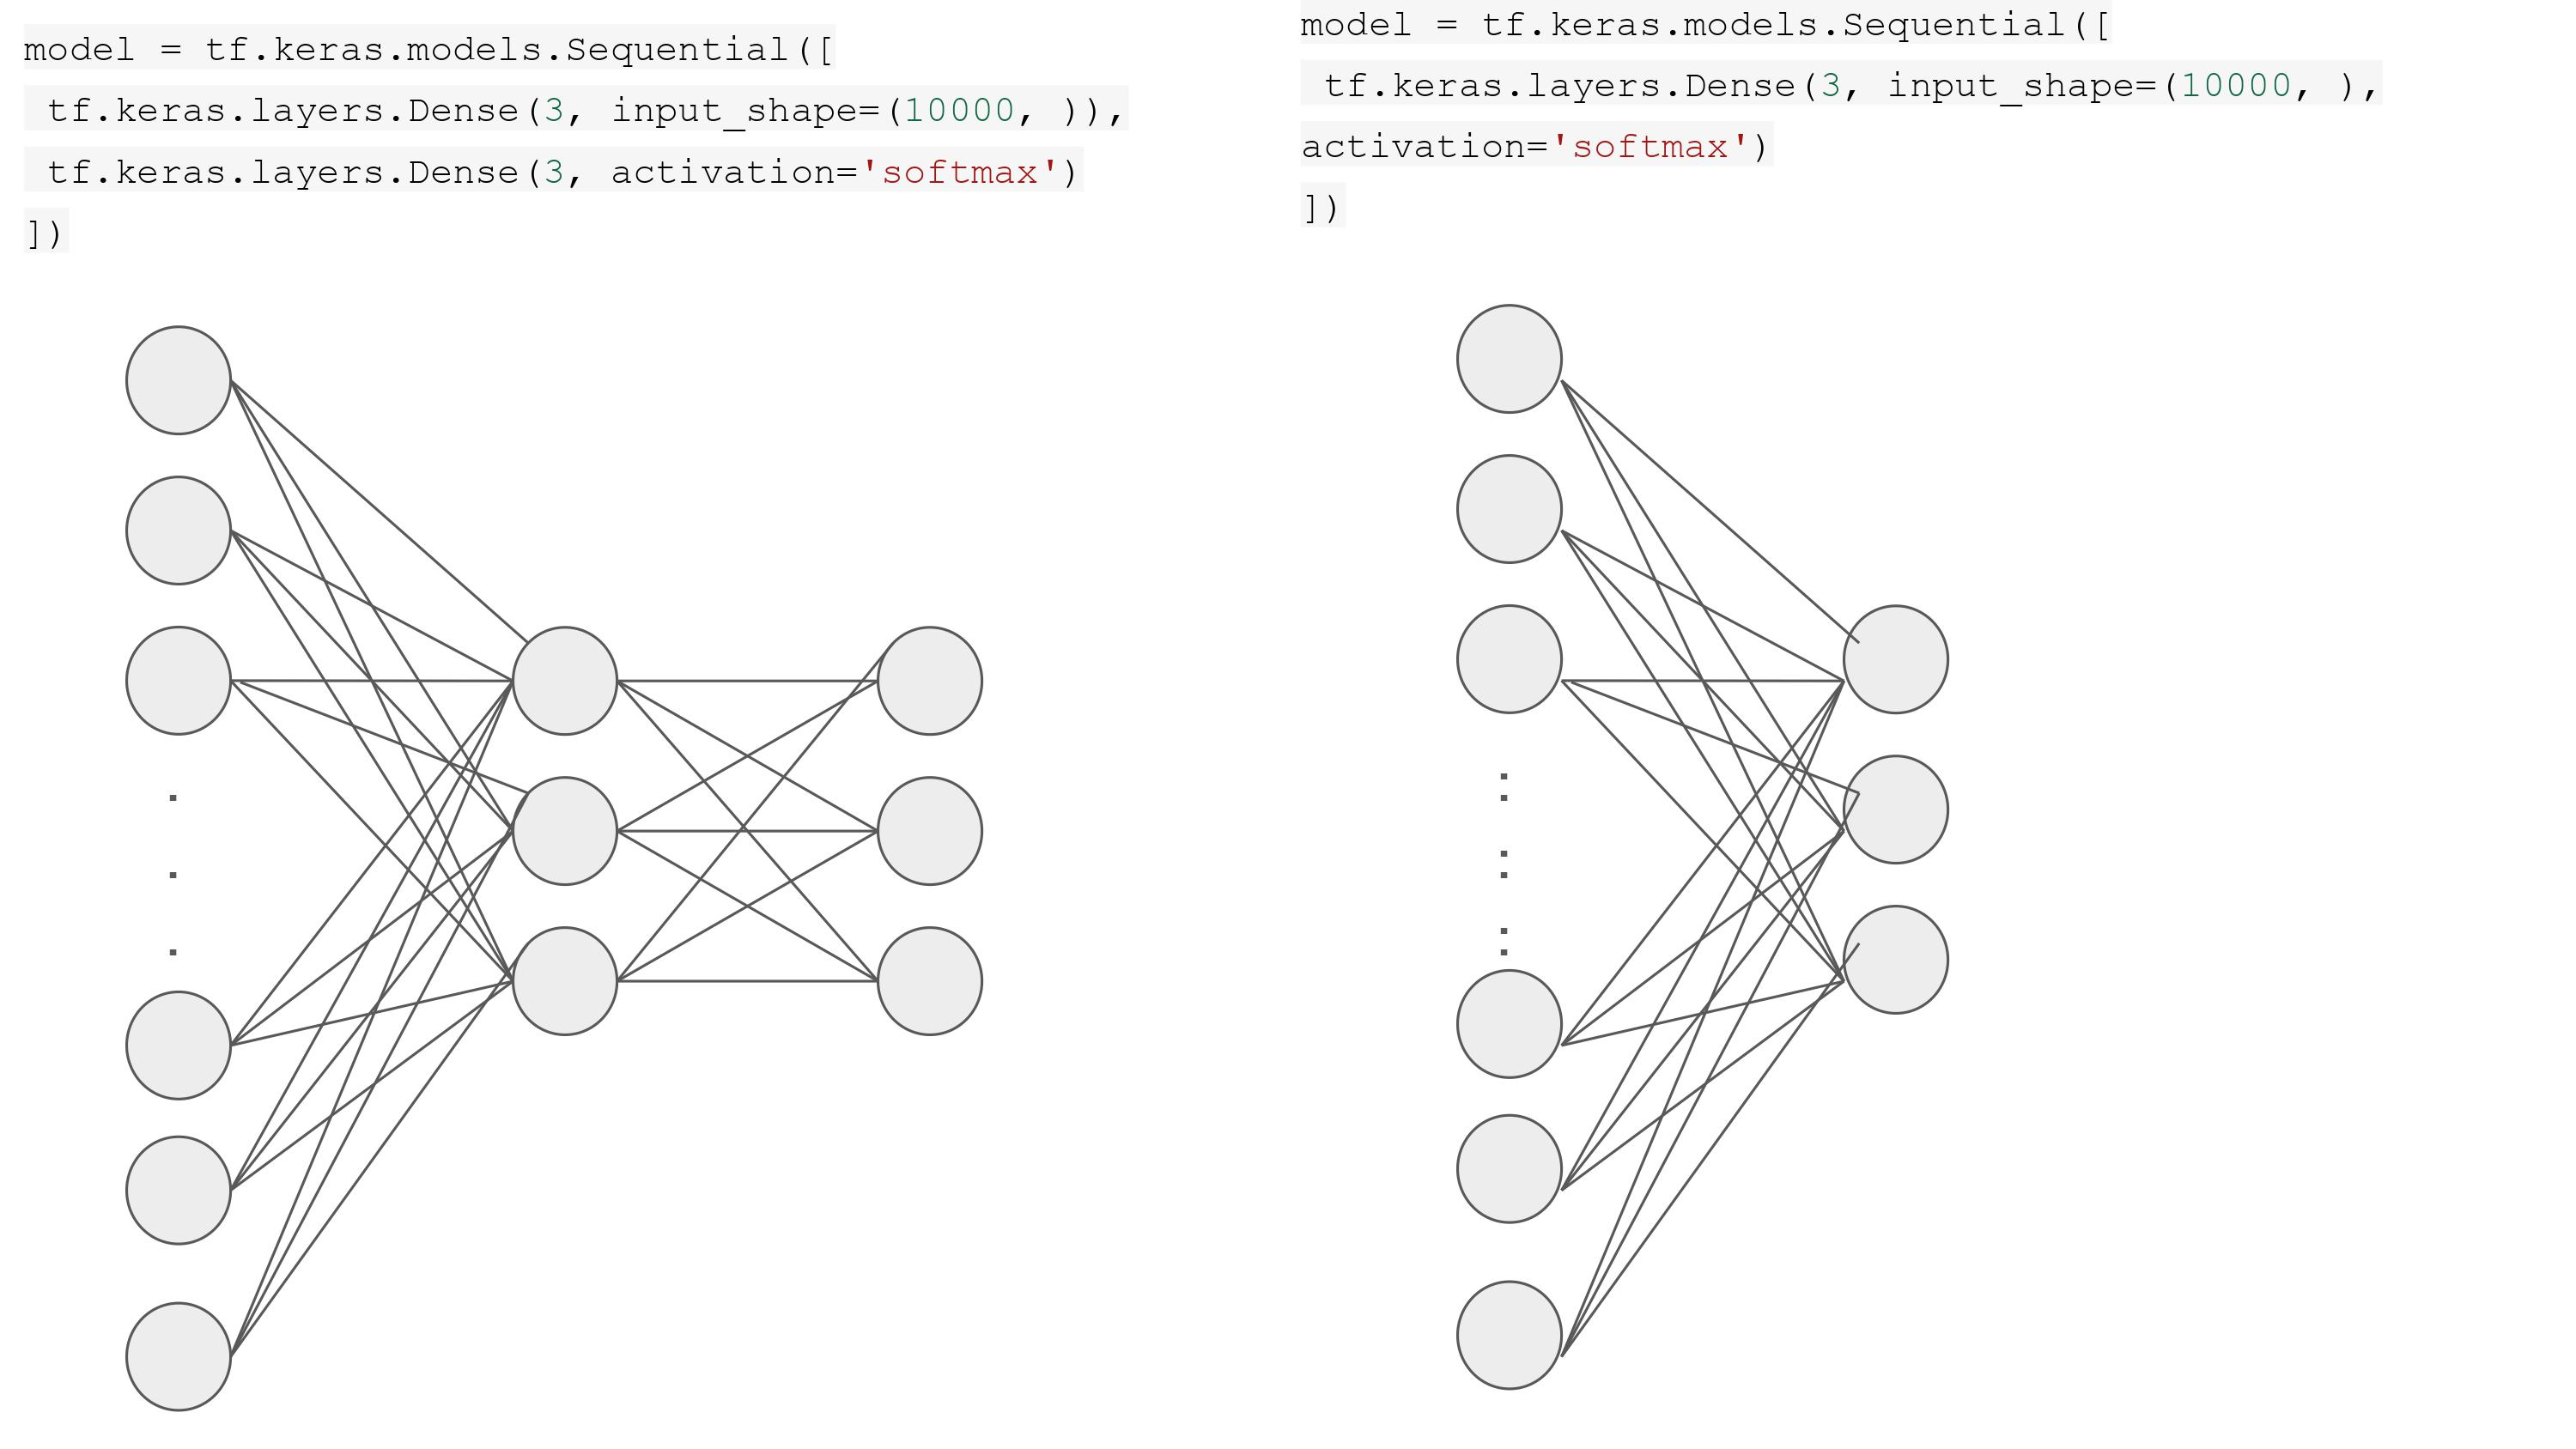

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [1]:
import zipfile
# import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
# from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# from pyESN.pyESN import ESN

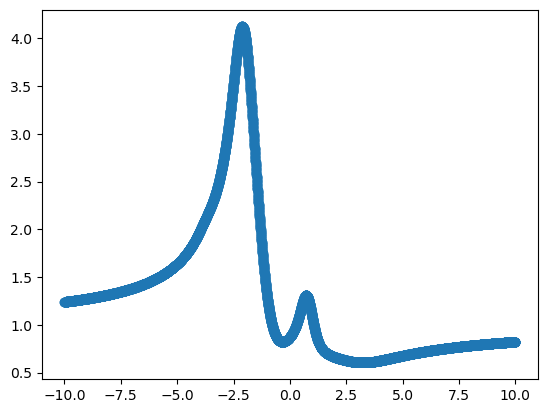

In [23]:
mat3 = scipy.io.loadmat('case3_extended_8000.mat')


downsample = 1
num_multi = 10
ns3_extended = mat3['ns']
nn_classic = mat3['n_a']

ns3_extended_down = ns3_extended[::downsample]
# downsampled_X = Y_test_r[::downsample]


g2_case3_extended = abs(mat3['g2_a'])
Delta_extended = mat3['Delta1_vector'][0]

g2_case3_extended_down = g2_case3_extended[::downsample]
Delta_extended_down = Delta_extended[::downsample]

len(Delta_extended_down)
plt.scatter(Delta_extended_down, g2_case3_extended_down)

In [21]:
ns3_extended_down

array([[array([[0.09084853, 0.09099968, 0.09122328, 0.09150497, 0.09183168,
                0.09219155, 0.09257399, 0.09296958, 0.09337009, 0.09376839,
                0.09347055, 0.09320373, 0.09296471, 0.09275058, 0.09255876,
                0.09238692, 0.09223298, 0.09209508, 0.09197154, 0.09186087,
                0.09084853, 0.09099968, 0.09122328, 0.09150497, 0.09183168,
                0.09219155, 0.09257399, 0.09296958, 0.09337009, 0.09376839,
                0.09347055, 0.09320373, 0.09296471, 0.09275058, 0.09255876,
                0.09238692, 0.09223298, 0.09209508, 0.09197154, 0.09186087]]),
        array([[0.09084855, 0.09099976, 0.09122344, 0.09150524, 0.09183207,
                0.09219209, 0.09257467, 0.09297042, 0.09337109, 0.09376954,
                0.09347158, 0.09320465, 0.09296554, 0.09275132, 0.09255943,
                0.09238752, 0.09223352, 0.09209556, 0.09197197, 0.09186125,
                0.09084855, 0.09099976, 0.09122344, 0.09150524, 0.09183207,
         

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


6400
1600
10


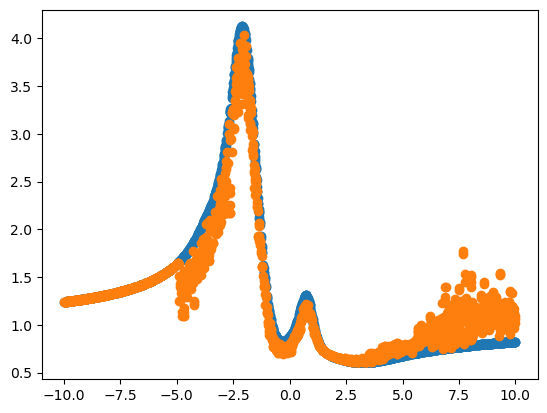

In [22]:
n_case3_extended_Delta = []
g2_re_extended = []
n_classic = []

for i in range(len(Delta_extended_down)):
    n_case3_extended_Delta.append(ns3_extended_down[0][i][0])
    g2_re_extended.append({g2_case3_extended_down[i][0]:Delta_extended_down[i]})
    n_classic.append(nn_classic[i][0])

n_case3_extended_Delta_multiplexing = [] 
for i in range(len(n_case3_extended_Delta)):
    n_case3_extended_Delta_multiplexing.append(n_case3_extended_Delta[i][0:num_multi])

X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta_multiplexing,g2_re_extended, test_size=0.2)
# X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta,g2_re_extended, test_size=0.2)    



Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []


for ele in Y_train_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))

regressor = RandomForestRegressor()
# regressor = ExtraTreesRegressor()
regressor.fit(X_train_c3_ex, Y_train_g2)
Y_predict_RFR = regressor.predict(X_test_c3_ex)

print(len(X_train_c3_ex))
print(len(X_test_c3_ex))
print(len(X_test_c3_ex[0]))

plt.scatter(Y_test_r,Y_test_g2)
plt.scatter(Y_test_r,Y_predict_RFR)

In [9]:
len(X_test_c3_ex)

400

In [ ]:
# def multiplexing(n_case3_extended_Delta, num_multi):
# # num_multi = 5
#     n_case3_extended_Delta_multiplexing = [] 
#     for i in range(len(n_case3_extended_Delta)):
#         n_case3_extended_Delta_multiplexing.append(n_case3_extended_Delta[i][0:num_multi])

#     X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta_multiplexing,g2_re_extended, test_size=0.05)
    
    
#     Y_train_g2 = []
#     Y_train_r = []
    
#     Y_test_g2 = []
#     Y_test_r = []
    
    
#     for ele in Y_train_c3_ex:
#       key = list(ele.keys())
#       value = list(ele.values())
#       Y_train_g2.append(key)
#       Y_train_r.append(value[0])
#     Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))
    
#     for ele in Y_test_c3_ex:
#       key = list(ele.keys())
#       value = list(ele.values())
#       Y_test_g2.append(key[0])
#       Y_test_r.append(value[0])
#     Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))
    
#     # regressor = RandomForestRegressor(n_estimators=100)
#     regressor = ExtraTreesRegressor()
#     regressor.fit(X_train_c3_ex, Y_train_g2)
#     Y_predict_RFR = regressor.predict(X_test_c3_ex)
#     # plt.scatter(Y_test_r, Y_test_g2,label = 'Ground Truth')
#     # plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')
#     # [mean_squared_error(Y_test_g2, Y_predict_RFR)]
#     Nomin = sum(np.square(np.reshape(Y_test_g2,[len(Y_predict_RFR),]) - Y_predict_RFR))
#     denom = sum(np.square(np.reshape(Y_test_g2,[len(Y_predict_RFR),]) + Y_predict_RFR))
#     (np.reshape(Y_test_g2,[400,])-np.shape(Y_predict_RFR))
#     return n_case3_extended_Delta_multiplexing, Y_test_r, Y_test_g2, Y_predict_RFR, Nomin/denom

In [5]:
nnn, Y_test_r, Y_test_g2, Y_predict_RFR, MSE = multiplexing(n_case3_extended_Delta,10)


C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [23]:
downsampled_X = Y_test_r[::8]
downsampled_Y = Y_test_g2[::8]

In [24]:
downsampled_X

[np.float64(4.3125),
 np.float64(-1.67),
 np.float64(7.41),
 np.float64(6.495000000000001),
 np.float64(7.700000000000001),
 np.float64(-7.6225000000000005),
 np.float64(-8.6525),
 np.float64(-7.1025),
 np.float64(-7.6),
 np.float64(-5.3774999999999995),
 np.float64(8.31),
 np.float64(5.3950000000000005),
 np.float64(-9.8825),
 np.float64(-7.8575),
 np.float64(-9.795),
 np.float64(0.027499999999999858),
 np.float64(-4.9775),
 np.float64(-1.192499999999999),
 np.float64(2.1225000000000005),
 np.float64(-8.2975),
 np.float64(0.14250000000000007),
 np.float64(-1.6850000000000005),
 np.float64(-8.555),
 np.float64(8.67),
 np.float64(8.685),
 np.float64(-9.11),
 np.float64(6.682500000000001),
 np.float64(-4.035),
 np.float64(7.615),
 np.float64(-7.5625),
 np.float64(-1.084999999999999),
 np.float64(1.1925000000000008),
 np.float64(2.8500000000000005),
 np.float64(5.5025),
 np.float64(0.41000000000000014),
 np.float64(7.237500000000001),
 np.float64(8.415000000000001),
 np.float64(-0.0150000

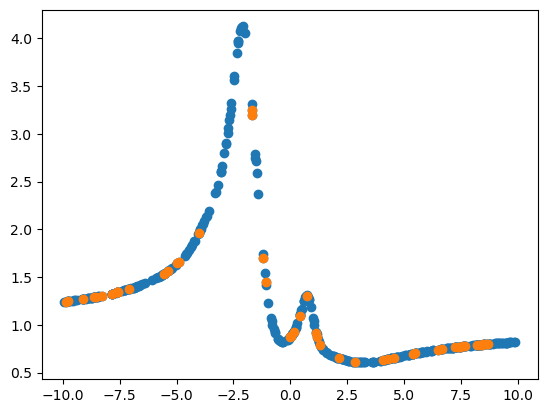

In [15]:
plt.scatter(Y_test_r,Y_test_g2)
plt.scatter(downsampled_X,downsampled_Y)

In [41]:
# a = np.array([1,2,3])
# b = np.array([4,6,7])
# Nomin = sum(np.square(a-b))
# denom = sum(np.square(a+b))
# Nomin/denom

In [42]:
# nnn, Y_test_r, Y_test_g2, Y_predict_RFR, MSE = multiplexing(n_case3_extended_Delta,4)
# plt.scatter(Y_test_r, Y_predict_RFR)
# # nnn

In [43]:
# nnn, Y_test_r, Y_test_g2, Y_predict_RFR, MSE = multiplexing(n_case3_extended_Delta,29)

In [44]:
Y_predict_ = []
MSE_list = [] 
Y_test_r_multi = []
for i in list(range(1, 20 + 1)):
    nnn, Y_test_r, Y_test_g2, Y_predict_RFR, MSE = multiplexing(n_case3_extended_Delta,i)
    Y_predict_.append(Y_predict_RFR)
    Y_test_r_multi.append(Y_test_r)
    MSE_list.append(MSE)
    # plt.plot(Y_test_r, Y_test_g2)

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [45]:
MSE_list

[np.float64(0.20751725396238566),
 np.float64(0.13856022918426492),
 np.float64(0.06536091505267899),
 np.float64(0.027105292729230675),
 np.float64(0.012284458352694311),
 np.float64(0.006590063462461951),
 np.float64(0.0025931087030735644),
 np.float64(0.0016852408426759739),
 np.float64(0.0007711455183658393),
 np.float64(0.0007094800210179454),
 np.float64(0.0004611220095135898),
 np.float64(0.0005370929253977324),
 np.float64(0.0005239053061685071),
 np.float64(0.00044709795947855903),
 np.float64(0.0005911373231638395),
 np.float64(0.0006684661639183885),
 np.float64(0.0006160286067438147),
 np.float64(0.0005421235236708225),
 np.float64(0.0005712934178256203),
 np.float64(0.0006318153578332458)]

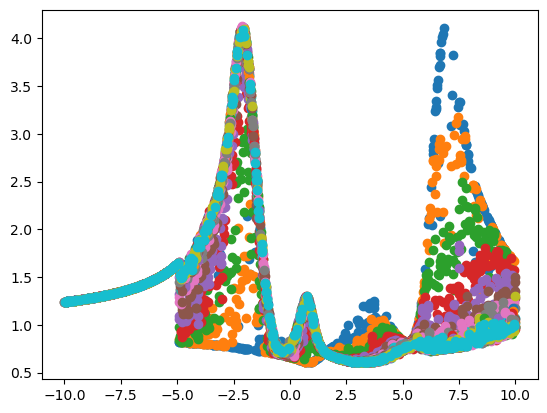

In [46]:
for i in range(20):
    plt.scatter(Y_test_r_multi[i], Y_predict_[i])

Text(0, 0.5, 'NMSE')

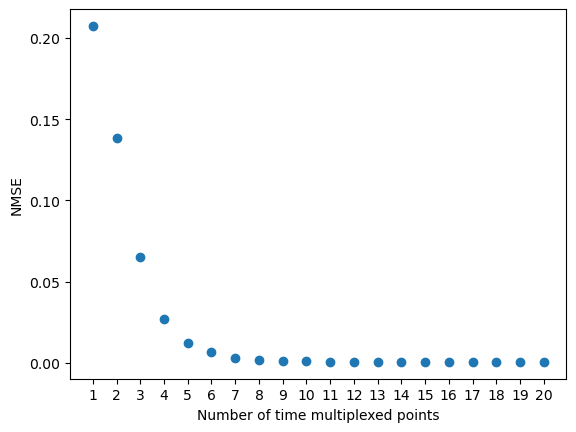

In [51]:
plt.scatter(list(range(1, 20 + 1)), MSE_list)
plt.xticks(list(range(1, 20 + 1)))
plt.xlabel('Number of time multiplexed points')
plt.ylabel('NMSE')

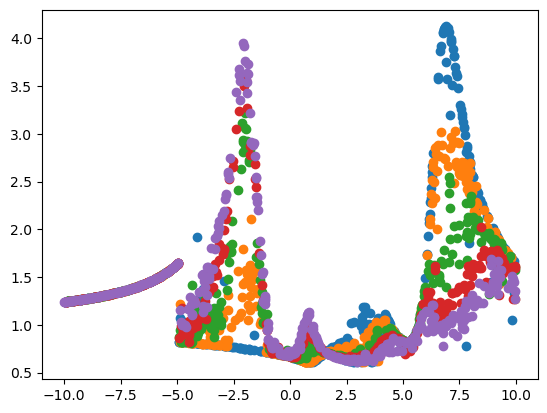

In [187]:
for i in range(5):
    plt.scatter(Y_test_r_multi[i], Y_predict_[i])

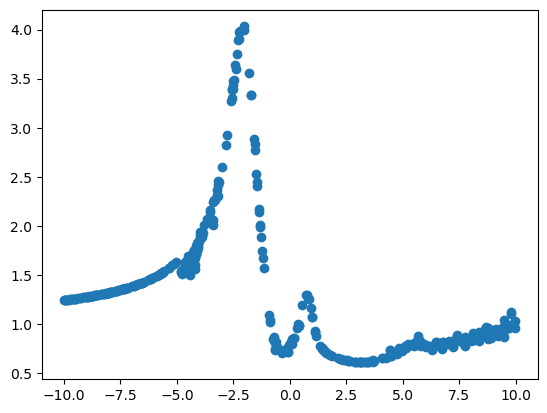

In [191]:
i = 19
plt.scatter(Y_test_r_multi[i], Y_predict_[i])

In [95]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []


for ele in Y_train_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))


In [96]:
# regressor = RandomForestRegressor(n_estimators=100)
regressor = ExtraTreesRegressor()
regressor.fit(X_train_c3_ex, Y_train_g2)
Y_predict_RFR = regressor.predict(X_test_c3_ex)


C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [97]:
print([mean_squared_error(Y_test_g2, Y_predict_RFR)])

[0.10024122451814761]


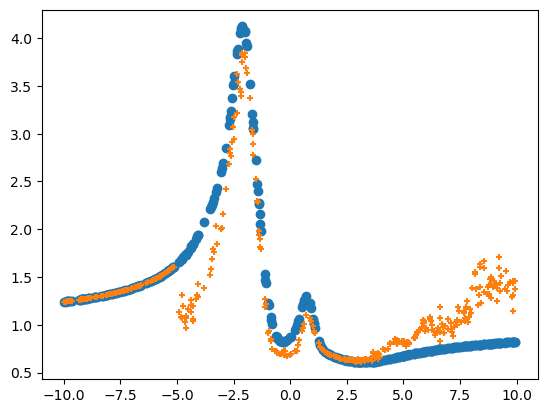

In [98]:
plt.scatter(Y_test_r, Y_test_g2,label = 'Ground Truth')
plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')

In [ ]:
# plt.scatter(Y_test_r, Y_test_g2,label = 'GroundTruth $g^{(2)}$')
# plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir $g^{(2)}$')
# plt.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'No reservoir $g^{(2)}$', alpha=0.5)
# plt.xlabel('$\Delta_{b}$',fontsize=20)
# plt.ylabel('$g^{(2)}$',fontsize=20)
# plt.xticks([-10,-5,0,5,10],fontsize=20)
# plt.yticks([1,2,3,4],fontsize=20)
# plt.legend(fontsize=16.8,markerscale=2,handletextpad=0.001, loc=1)
# ax = plt.gca() #you first need to get the axis handle
# ax.set_aspect(4) #sets the height to weight ratio to 2
# # plt.plot(x,y)